## Fitting the rotation curve

### Read in data

#### Usual imports

In [5]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, clear_output

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Constants

In [6]:
R0 = 8.5 # kpc

V0 = 220 # km/s

#### Reads archive data

In [8]:
path_name = path.join(".\\results\\", "max_vel.csv")

vals_df = pd.read_csv(path_name, skipinitialspace = True)

vals_df

,longitude,v_obs_max,v_error
0,0,55,5
1,10,200,5
2,20,152,5
3,30,134,5
4,40,113,5
5,50,99,5
6,60,68,5
7,70,51,5
8,80,48,5
9,90,37,5


#### Calculates R and V

$R=R_0 \sin{\theta_{obs}}\\$
$V=V_{obs}+V_0 \sin{\theta_{obs}}$

In [9]:
vals_df['R'] = R0*np.sin(np.radians(vals_df['longitude']))
vals_df['V'] = vals_df['v_obs_max']+ V0*np.sin(np.radians(vals_df['longitude']))
vals_df['V_err'] = vals_df['v_error']

vals_df

,longitude,v_obs_max,v_error,R,V,V_err
0,0,55,5,0.000000,55.000000,5
1,10,200,5,1.476010,238.202599,5
2,20,152,5,2.907171,227.244432,5
3,30,134,5,4.250000,244.000000,5
4,40,113,5,5.463695,254.413274,5
5,50,99,5,6.511378,267.529777,5
6,60,68,5,7.361216,258.525589,5
7,70,51,5,7.987387,257.732377,5
8,80,48,5,8.370866,264.657706,5
9,90,37,5,8.500000,257.000000,5


<ErrorbarContainer object of 3 artists>

Text(0.5, 0, '$\\mathrm{R\\;/kpc}$')

Text(0, 0.5, '$\\mathrm{V\\;/km\\,s^{-1}}$')

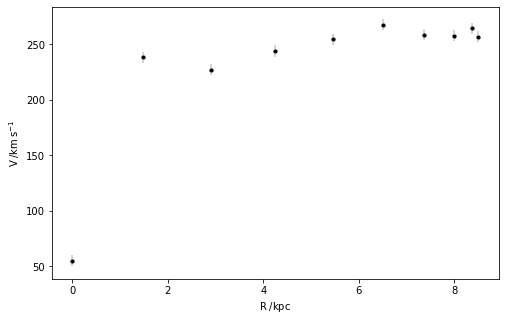

In [11]:
plt.rcParams["scatter.marker"] = "."
plt.rcParams["figure.figsize"] = [8, 5]

plt.scatter(vals_df["R"], vals_df["V"])
plt.errorbar(
    vals_df["R"],
    vals_df["V"],
    yerr=vals_df["V_err"],
    color="black",
    fmt=".",
    ecolor="lightgray",
    elinewidth=2,
    capsize=0,
)

plt.xlabel(r"$\mathrm{R\;/kpc}$")
plt.ylabel(r"$\mathrm{V\;/km\,s^{-1}}$")
plt.savefig(path.join(".\\results\\", "rotation_scatter.png"))
plt.show()

Optimised parameters are: 255.1142699196798 199.7147095718812 1.4464313782046827


Text(0.5, 0, '$\\mathrm{R\\;/kpc}$')

Text(0, 0.5, '$\\mathrm{V\\;/km\\,s^{-1}}$')

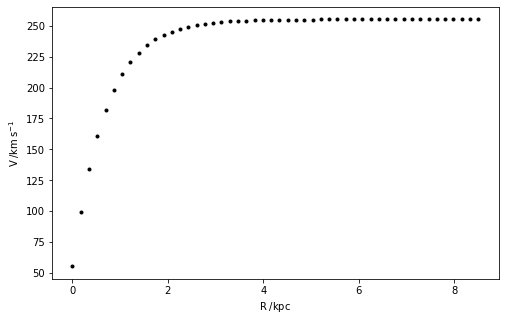

In [13]:
from scipy.optimize import curve_fit

plt.rcParams["figure.figsize"] = [8, 5]

# Here's a simple mathematical curve that might fit
def gal_curve(r, C0, C1, C2):
    return C0 - C1 * np.exp(-C2 * r)


R = vals_df["R"].values
V = vals_df["V"].values
R2 = np.linspace(0, 8.5, 50)

# Use some trial values for initial parameters for the constants
p0 = [250, 200, 0.15]

# and fit the curve
c, pcov = curve_fit(gal_curve, R, V, p0)

print("Optimised parameters are:", *c)

# Plot it
plt.scatter(R2, gal_curve(R2, *c), color="black")
plt.xlabel(r"$\mathrm{R\;/kpc}$")
plt.ylabel(r"$\mathrm{V\;/km\,s^{-1}}$")
plt.savefig(path.join(".\\results\\", "rotation_curve.png"))
plt.show()

In [14]:
try:
    vals_df.to_csv('rot_curve_data.csv',index=False)
except PermissionError as error:
    print(error)
    print('Might want to check if file is in use somewhere')
    

In [ ]:
vals_df